In [1]:
import pandas as pd

from lib.torch_helper import get_stock_data
from lib.stocktrainer import StockTrainer

In [2]:
# Configuration
data = {}
for k in ["spy", "amd"]: # , "tsla", "aapl", "nflx", "amzn"]:
    data[k] = get_stock_data(k, period="15y")

stock_data = pd.concat(list(data.values())).reset_index(drop=True)
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
stock_data.shape

(7540, 23)

In [3]:
wanted_cols = ["Ticker", "time_idx", "Date", "Close", "Volume", "EFFR", "UMCSENT", "VIX", "USDX", "ATR", "RSI", "MACD-2", "CloseWT"]
stock_data[wanted_cols]

,Ticker,time_idx,Date,Close,Volume,EFFR,UMCSENT,VIX,USDX,ATR,RSI,MACD-2,CloseWT
0,SPY,1,2008-07-01,95.862602,388622000,2.11,61.2,23.650000,72.370003,2.068389,44.803369,0.169932,95.041222
1,SPY,2,2008-07-02,94.219841,288064600,1.95,61.2,25.920000,72.029999,2.068389,44.803369,0.169932,94.268375
2,SPY,3,2008-07-03,94.316910,239352500,1.92,61.2,24.780001,72.739998,2.068389,44.803369,0.169932,93.835289
3,SPY,4,2008-07-07,93.353668,372427300,1.99,61.2,25.780001,72.669998,2.068389,44.803369,0.169932,94.182507
4,SPY,5,2008-07-08,95.011345,375973700,1.97,61.2,23.150000,73.010002,2.068389,44.803369,0.169932,94.096626
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7535,AMD,3766,2023-06-20,118.930000,58851800,5.07,62.0,13.880000,102.540001,5.488583,54.116151,-1.086041,115.520000
7536,AMD,3767,2023-06-21,112.110001,82835600,5.07,62.0,13.200000,102.070000,5.633684,46.658425,-1.786883,111.404999
7537,AMD,3768,2023-06-22,110.699997,70754800,5.07,62.0,12.910000,102.389999,5.527707,45.269416,-2.278796,110.355000
7538,AMD,3769,2023-06-23,110.010002,73545600,5.07,62.0,13.440000,102.900002,5.392871,44.570171,-2.562826,108.760002


In [4]:
trainer = StockTrainer(
    stock_data[["Open", "Close", "Volume", "time_idx", "Ticker", "Date"]],
    learning_rate=0.007311840400210834
    device="cpu",
    group_id="Ticker",
    time_idx="time_idx",
    target="Close",
    train_on=[
        # "Imp Vol", "Put/Call Vol", "Options Vol", "Put/Call OI", 
        # "EFFR", "UMCSENT", "UNRATE", "USDX", "VIX", 
        "Open", "Close", "Volume",
        # "ATR", "RSI", "MACD-2"
    ],
    batch_size=128,
    max_epoch=200,
    max_encoder_length=24,
    max_prediction_length=6,
    learning_rate=0.003
)
trainer.create_model()

In [5]:
trainer.training.get_parameters()

{'time_idx': 'time_idx',
 'target': 'Close',
 'group_ids': ['Ticker'],
 'weight': None,
 'max_encoder_length': 24,
 'min_encoder_length': 24,
 'min_prediction_idx': 1,
 'min_prediction_length': 1,
 'max_prediction_length': 6,
 'static_categoricals': ['Ticker'],
 'static_reals': ['encoder_length', 'Close_center', 'Close_scale'],
 'time_varying_known_categoricals': [],
 'time_varying_known_reals': ['time_idx', 'relative_time_idx'],
 'time_varying_unknown_categoricals': [],
 'time_varying_unknown_reals': ['Open', 'Close', 'Volume'],
 'variable_groups': {},
 'constant_fill_strategy': {},
 'allow_missing_timesteps': True,
 'lags': {},
 'add_relative_time_idx': True,
 'add_target_scales': True,
 'add_encoder_length': True,
 'target_normalizer': GroupNormalizer(
 	method='standard',
 	groups=['Ticker'],
 	center=True,
 	scale_by_group=True,
 	transformation='softplus',
 	method_kwargs={}
 ),
 'categorical_encoders': {'__group_id__Ticker': NaNLabelEncoder(add_nan=False, warn=True),
  'Ticker':

In [6]:
hyper_params1 = {
    "gradient_clip_val": 0.05130328983794089,
    "hidden_size": 97,
    "dropout": 0.20191453684086638,
    "hidden_continuous_size": 61,
    "attention_head_size": 2,
    "learning_rate": 0.015631929305749356,
}

hyper_params2 = {
    'gradient_clip_val': 0.05, 
    'hidden_size': 11, 
    'dropout': 0.1259, 
    'hidden_continuous_size': 9, 
    'attention_head_size': 2, 
    'learning_rate': 0.003092404105946767
}

hyper_params3 = {
    'gradient_clip_val': 0.8908901211920455, 
    'hidden_size': 18, 
    'dropout': 0.12591833410563377, 
    'hidden_continuous_size': 14, 
    'attention_head_size': 1, 
    'learning_rate': 0.003092404105946767
}

# Trial 3 finished with value: 2.874574661254883 and parameters: 
hyper_params4 = {'gradient_clip_val': 0.5578743799195767, 'hidden_size': 11, 'dropout': 0.28165182231228214, 'hidden_continuous_size': 8, 'attention_head_size': 1, 'learning_rate': 0.009269161059137894}

# Trial 16 finished with value: 2.189265489578247 and parameters: 
hyper_params5 = {'gradient_clip_val': 0.13385769137287234, 'hidden_size': 13, 'dropout': 0.16083967259299664, 'hidden_continuous_size': 9, 'attention_head_size': 2, 'learning_rate': 0.017509250753868496}

# Trial 0 finished with value: 23.786928176879883 and parameters: 
hyper_params6 = {'gradient_clip_val': 0.029203746112397976, 'hidden_size': 9, 'dropout': 0.11974671041496558, 'hidden_continuous_size': 8, 'attention_head_size': 2, 'learning_rate': 0.01981103833917436}

# Trial 0 finished with value: 25.99085235595703 and parameters: 
hyper_params7 = {
    'gradient_clip_val': 0.47197106236873587, 
    'hidden_size': 31, 
    'dropout': 0.20231509710955523, 
    'hidden_continuous_size': 21, 
    'attention_head_size': 2, 
    'learning_rate': 0.007311840400210834
}

trainer.train(**hyper_params7, optimizer="Ranger")

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 2     
3  | prescalers                         | ModuleDict                      | 336   
4  | static_variable_selection          | VariableSelectionNetwork        | 7.9 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 13.2 K
6  | decoder_variable_selection         | VariableSelectionNetwork        | 5.1 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 4.0 K 
8  | static

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

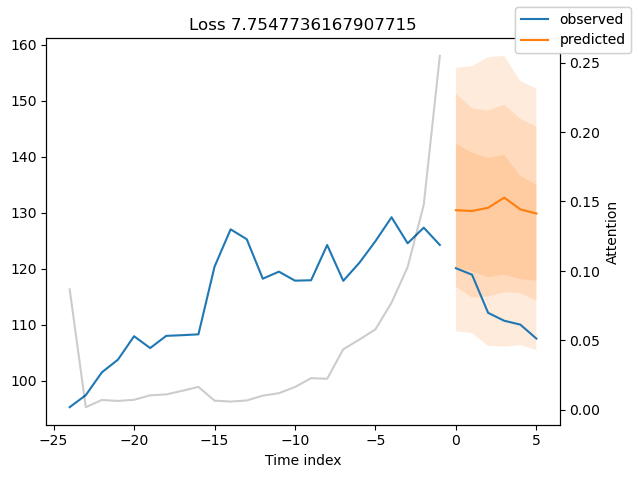

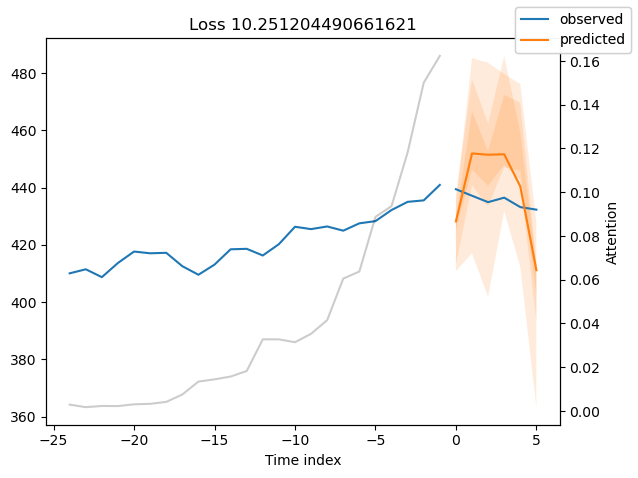

In [7]:
from pytorch_forecasting import TemporalFusionTransformer

best_model_path = trainer.trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

raw_predictions = best_tft.predict(
    trainer.val_dataloader,
    mode="raw",
    return_x=True,
    fast_dev_run=False
)

for k in range(len(raw_predictions[0][0])):
    plt = best_tft.plot_prediction(
        raw_predictions.x,
        raw_predictions.output,
        idx=k, add_loss_to_title=True
    )
    plt.legend()
    plt.savefig(f"./train_images/predict-{k}.png", dpi=300)
    plt.show()


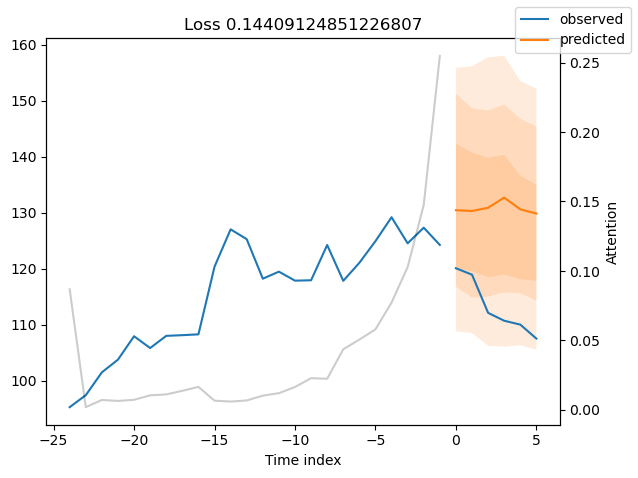

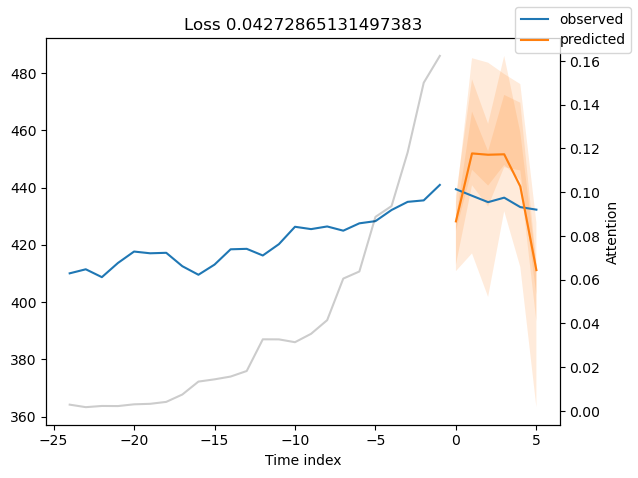

In [8]:
from pytorch_forecasting.metrics import SMAPE

# calcualte metric by which to display
predictions = best_tft.predict(trainer.val_dataloader, return_y=True)
mean_losses = SMAPE(reduction="none")(predictions.output, predictions.y).mean(1)
indices = mean_losses.argsort(descending=True)  # sort losses
for idx in range(indices.shape[0]):
    best_tft.plot_prediction(
        raw_predictions.x,
        raw_predictions.output,
        idx=indices[idx],
        add_loss_to_title=SMAPE(quantiles=best_tft.loss.quantiles),
    )

{'encoder_length': <Figure size 1000x500 with 2 Axes>,
 'Close_center': <Figure size 1000x500 with 2 Axes>,
 'Close_scale': <Figure size 1000x500 with 2 Axes>,
 'time_idx': <Figure size 1000x500 with 2 Axes>,
 'relative_time_idx': <Figure size 1000x500 with 2 Axes>,
 'Open': <Figure size 1000x500 with 2 Axes>,
 'Close': <Figure size 1000x500 with 2 Axes>,
 'Volume': <Figure size 1000x500 with 2 Axes>,
 'Ticker': <Figure size 640x480 with 2 Axes>}

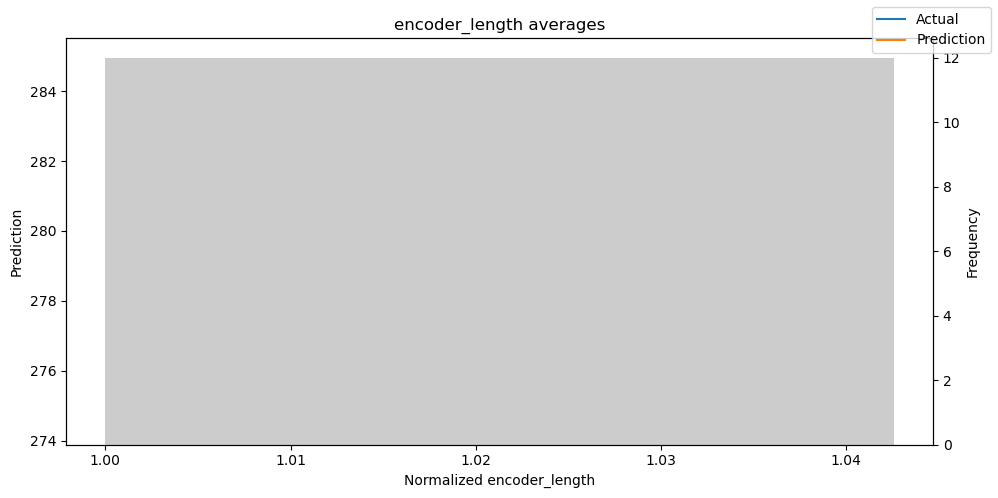

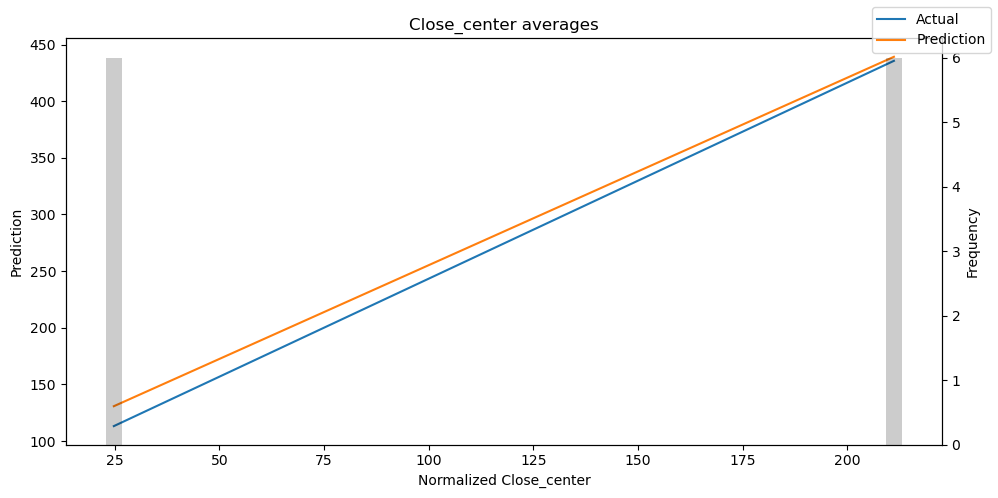

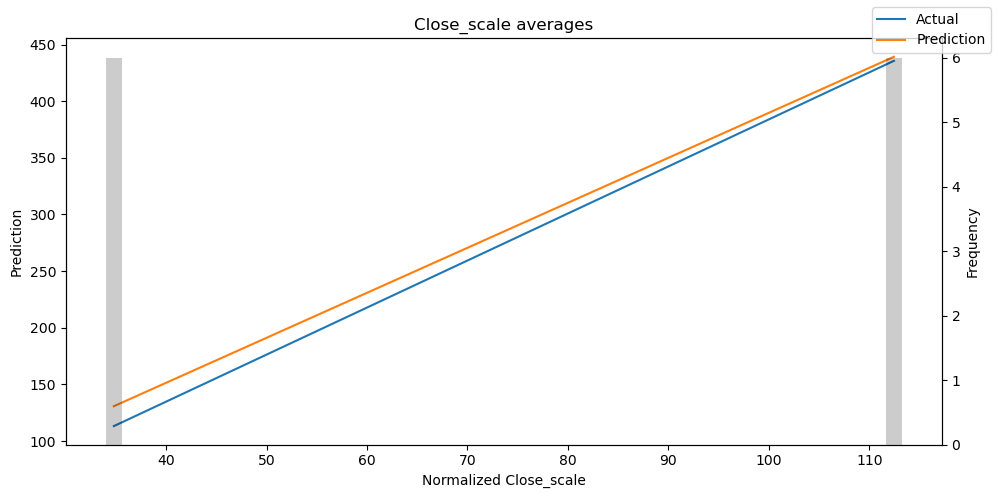

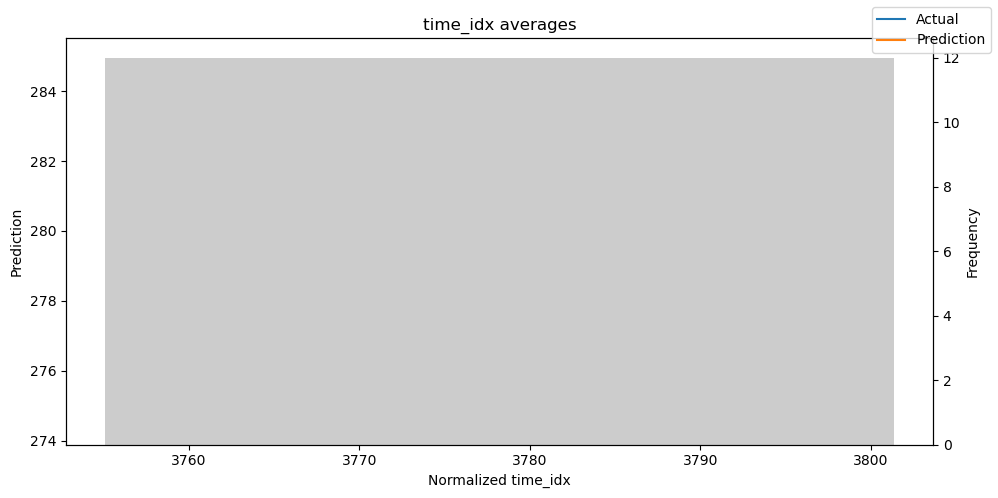

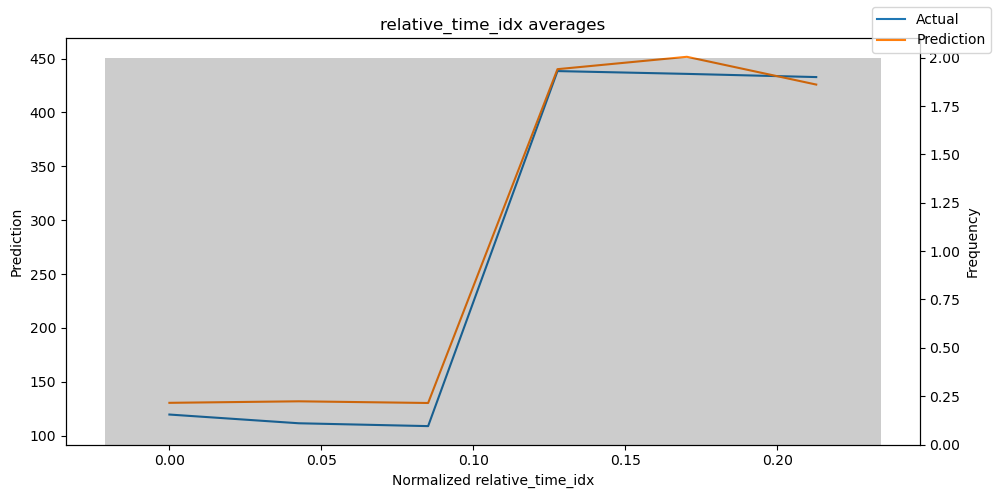

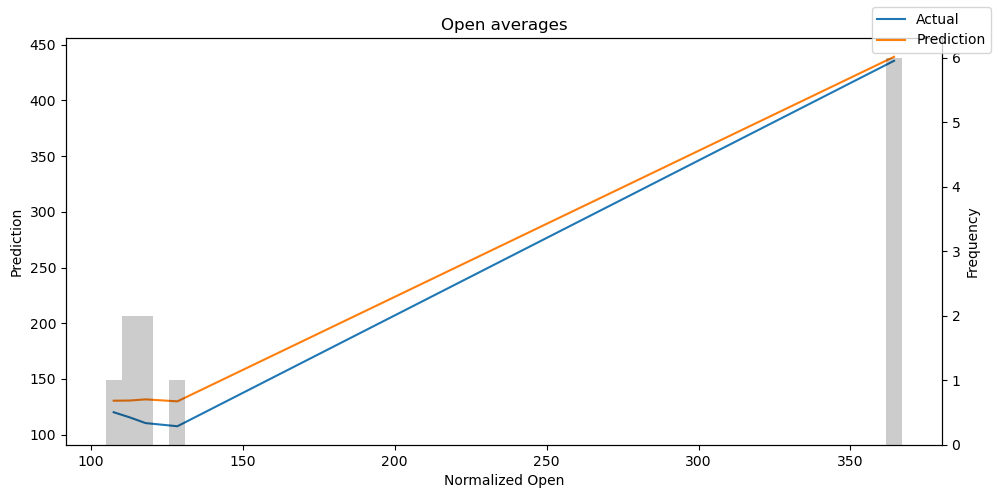

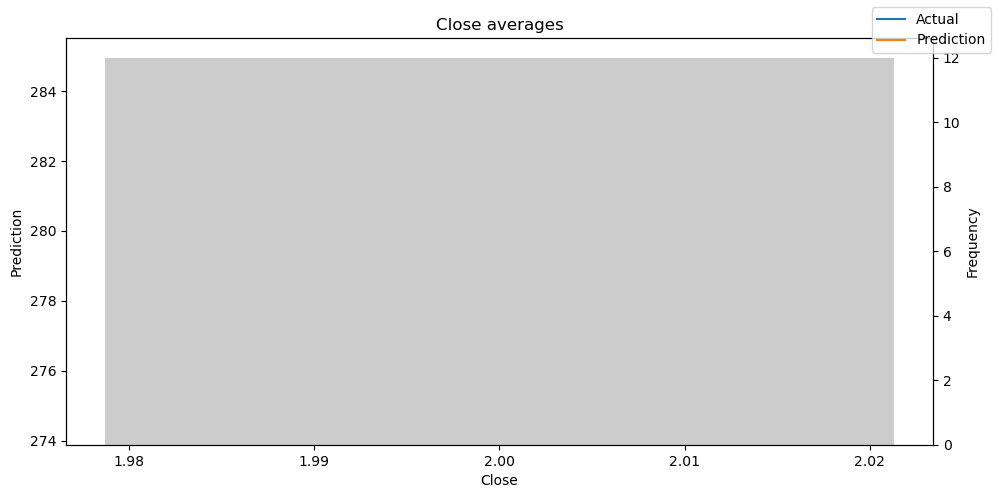

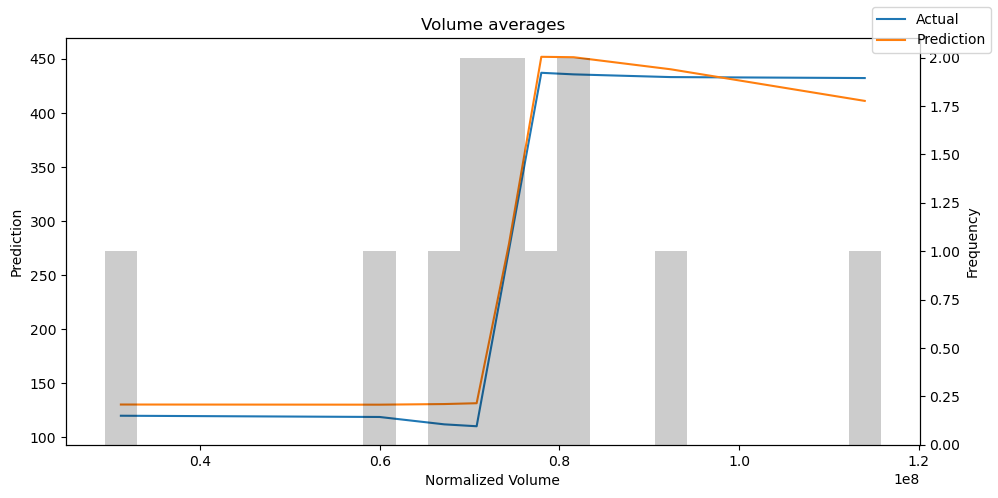

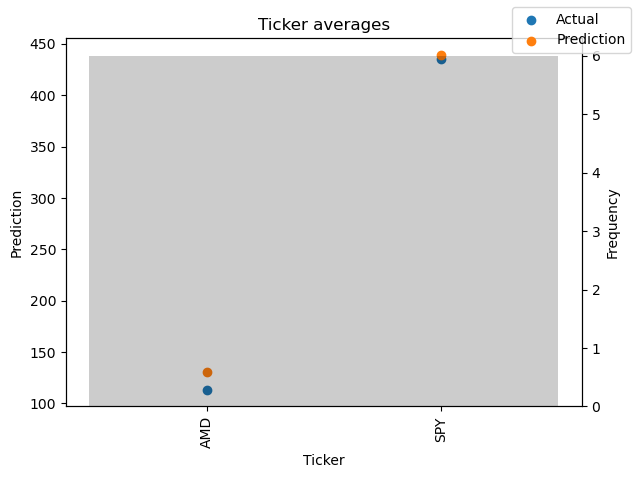

In [9]:
predictions = best_tft.predict(trainer.val_dataloader, return_x=True)
predictions_vs_actuals = best_tft.calculate_prediction_actual_by_variable(predictions.x, predictions.output)
best_tft.plot_prediction_actual_by_variable(predictions_vs_actuals)

{'attention': <Figure size 640x480 with 1 Axes>,
 'static_variables': <Figure size 700x300 with 1 Axes>,
 'encoder_variables': <Figure size 700x325 with 1 Axes>,
 'decoder_variables': <Figure size 700x250 with 1 Axes>}

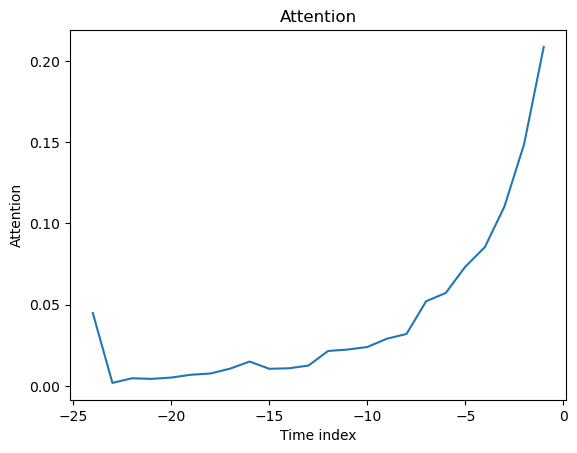

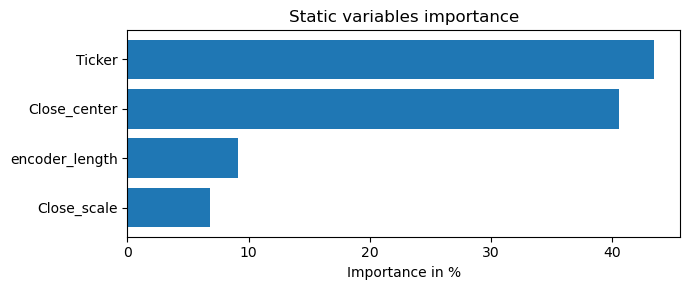

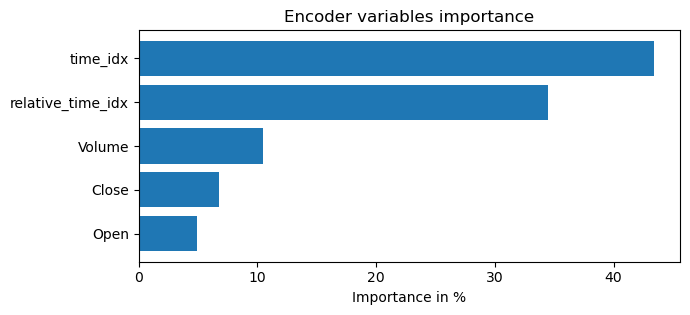

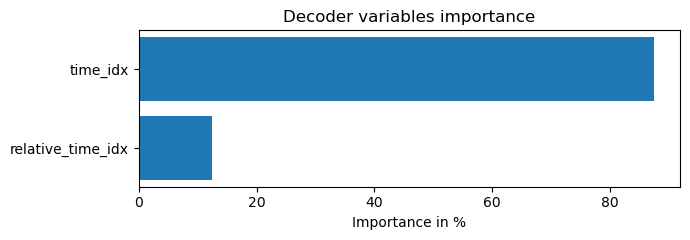

In [10]:
interpretation = best_tft.interpret_output(raw_predictions.output, reduction="sum")
best_tft.plot_interpretation(interpretation)